In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [36]:
class signhal:

    amplitude: float
    n_periods: float
    shift: float

    def sine_wave(time_array, amplitude = 1.0, shift = 0):
        scale = (2 * np.pi) / (time_array[-1] - time_array[0])
        return amplitude * np.sin(scale * (time_array - shift))
    
    def triangle(time_array, amplitude = 1.0):
        quarter_period = (time_array[-1] - time_array[0]) / 4
        first_rise = []
        second_rise = []
        decline = []
        for i in range(len(time_array)):
            if time_array[i] <= quarter_period:
                first_rise.append(amplitude / quarter_period * (time_array[i]))
            elif (time_array[i] > quarter_period) and (time_array[i] < 3 * quarter_period):
                decline.append(- amplitude / quarter_period * (time_array[i] - quarter_period) + amplitude)
            else:
                second_rise.append(amplitude / quarter_period * (time_array[i] - 3 * quarter_period) - amplitude)
        return np.concatenate([first_rise, decline, second_rise])
    
    def bipolar_rectangle(time_array, amplitude_time = 0.25, positive_amplitude = 1.0, negative_amplitude = -1.0):
        half_period = (time_array[-1] - time_array[0]) / 2
        voltage = []
        for i in range(len(time_array)):
            if time_array[i] <= half_period * (1 - 2 *  amplitude_time):
                voltage.append(0)
            elif (time_array[i] > half_period * (1 - 2 *  amplitude_time)) and (time_array[i] < half_period):
                voltage.append(positive_amplitude)
            elif (time_array[i] >= half_period) and (time_array[i] < 2 * half_period * (1 - amplitude_time)):
                voltage.append(0)
            else:
                voltage.append(negative_amplitude)
        voltage[-1] = 0
        return np.array(voltage)



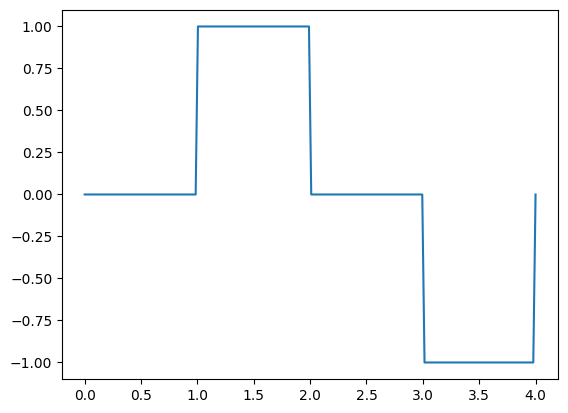

In [37]:
t = np.linspace(0,4,200)
V = signhal.bipolar_rectangle(t)

plt.plot(t, V)